In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 

True

In [2]:
data = pd.read_csv(os.getenv("dataFile"))
IDs = pd.read_csv(os.getenv("encodingFile"))

In [3]:
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   data.replace('?', None, inplace=True)
   print(data.isnull().sum())
# data.describe()

Column Name :  encounter_id
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride         

In [4]:
for (columnName, columnData) in data.items():
    if(data[columnName].isnull().sum()/data[columnName].count() >= 0.9 ):
        data.drop(columnName,axis=1, inplace = True)
print(data.head())

   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ...  citoglipton  insulin  \
0                 1       None  ...           No       No   
1                 3       None  ...           No      

In [5]:
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   print('Missing values:', columnData.isnull().sum())

Column Name :  encounter_id
Missing values: 0
Column Name :  patient_nbr
Missing values: 0
Column Name :  race
Missing values: 2273
Column Name :  gender
Missing values: 0
Column Name :  age
Missing values: 0
Column Name :  admission_type_id
Missing values: 0
Column Name :  discharge_disposition_id
Missing values: 0
Column Name :  admission_source_id
Missing values: 0
Column Name :  time_in_hospital
Missing values: 0
Column Name :  payer_code
Missing values: 40256
Column Name :  num_lab_procedures
Missing values: 0
Column Name :  num_procedures
Missing values: 0
Column Name :  num_medications
Missing values: 0
Column Name :  number_outpatient
Missing values: 0
Column Name :  number_emergency
Missing values: 0
Column Name :  number_inpatient
Missing values: 0
Column Name :  diag_1
Missing values: 21
Column Name :  diag_2
Missing values: 358
Column Name :  diag_3
Missing values: 1423
Column Name :  number_diagnoses
Missing values: 0
Column Name :  metformin
Missing values: 0
Column Name 

In [11]:
##help(pd.get_dummies)
# data.describe()

In [6]:
admission_type_map = {
    1: "Emergency", 2: "Urgent", 3: "Elective", 4: "Newborn",
    5: "Not Available", 6: "NULL", 7: "Trauma Center", 8: "Not Mapped"
}

discharge_disposition_map = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab facility including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

admission_source_map = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critical access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}



In [7]:
data['admission_type_desc'] = data['admission_type_id'].map(admission_type_map)
data['discharge_desc'] = data['discharge_disposition_id'].map(discharge_disposition_map)
data['admission_source_desc'] = data['admission_source_id'].map(admission_source_map)
data=pd.get_dummies(data,columns=['admission_type_desc'])
data=pd.get_dummies(data,columns=['discharge_desc'])
data=pd.get_dummies(data,columns=['admission_source_desc'])
data.drop('admission_type_id',axis = 1, inplace = True)
data.drop('discharge_disposition_id',axis = 1, inplace = True)
data.drop('admission_source_id',axis = 1, inplace = True)
# print(data.head())

##print(data.head())
# data.describe()

In [14]:
# sns.heatmap(data.corr(),annot=True, annot_kws={'size': 6.5})
# plt.show()

In [8]:
# Function to extract midpoint from range string
def extract_midpoint(range_str):
    try:
        # Extract the numbers from strings like '[0-10]'
        range_str = range_str.strip('[]()')  # Remove brackets
        lower, upper = map(int, range_str.split('-'))  # Split by hyphen and convert to integers
        return (lower + upper) / 2  # Return the midpoint
    except:
        return None  # Return None if conversion fails

# Apply the function to the 'age' column
# print("Original 'age' column (first few values):")
# print(data['age'].head())

# Convert age ranges to midpoints
data['age_numeric'] = data['age'].apply(extract_midpoint)

print("\nConverted 'age_numeric' column (first few values):")
print(data['age_numeric'].head())

# If you want to replace the original column instead of creating a new one:
# data['age'] = data['age'].apply(extract_midpoint)

# Check if there were any values that couldn't be converted
null_count = data['age_numeric'].isna().sum()
print(f"\nNumber of values that couldn't be converted: {null_count}")

# If there are any null values, you might want to investigate
if null_count > 0:
    print("\nSample of problematic values:")
    problematic = data[data['age_numeric'].isnull()]['age'].unique()
    print(problematic[:5])  # Print up to 5 unique problematic values


# Ensure the 'age' column is not dropped before applying the extract_midpoint function
# Drop the 'age' column only after creating 'age_numeric'
data.drop('age', axis=1, inplace=True)
# data.describe()


Converted 'age_numeric' column (first few values):
0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
Name: age_numeric, dtype: float64

Number of values that couldn't be converted: 0


In [9]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,95.000000


In [10]:

# First, examine which columns are being detected as 'object' type
object_cols = data.select_dtypes(include=['object']).columns
print(f"Columns detected as 'object' type: {list(object_cols)}")

# Check each object column to see if it contains numeric values stored as strings
for col in object_cols:
    print(f"\nColumn '{col}' sample values:")
    print(data[col].head())
    
    # Try to convert to numeric and see if it works
    numeric_conversion = pd.to_numeric(data[col], errors='coerce')
    conversion_success_rate = 1 - (numeric_conversion.isna().sum() / len(data))
    print(f"Successfully converts to numeric: {conversion_success_rate:.1%}")
    
    if conversion_success_rate > 0.9:  # If over 90% converts successfully
        print(f"⚠️ Column '{col}' appears to contain numeric data stored as strings!")
        # Convert the column to numeric
        data[col] = numeric_conversion
        print(f"✓ Converted '{col}' to numeric type")

# After conversion, re-detect categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns after conversion: {list(categorical_cols)}")



Columns detected as 'object' type: ['race', 'gender', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Column 'race' sample values:
0          Caucasian
1          Caucasian
2    AfricanAmerican
3          Caucasian
4          Caucasian
Name: race, dtype: object
Successfully converts to numeric: 0.0%

Column 'gender' sample values:
0    Female
1    Female
2    Female
3      Male
4      Male
Name: gender, dtype: object
Successfully converts to numeric: 0.0%

Column 'payer_code' sample values:
0    None
1    None
2    None
3    None
4    None
Name: payer_code, dtype: object
S

In [11]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,100100.00000,98872.000000,95285.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,493.58307,438.674883,418.179285,7.422607,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,206.71532,178.901638,177.323979,1.933600,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.00000,5.000000,3.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,410.00000,276.000000,272.000000,6.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,440.00000,425.000000,403.000000,8.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,599.00000,530.000000,496.000000,9.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,999.00000,999.000000,999.000000,16.000000,95.000000


In [12]:
# Now proceed with your original one-hot encoding and correlation analysis
for columnName in categorical_cols:
    data = pd.get_dummies(data, columns=[columnName])

corr_matrix = data.corr()

# Original low correlation filtering
# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.5)]
# data.drop(columns=low_corr_columns, inplace=True)

low_corr_columns = []
for col in corr_matrix.columns:
    # Get correlations excluding self (which is always 1.0)
    max_corr = corr_matrix[col].drop(col).abs().max()
    if max_corr < 0.3:
        low_corr_columns.append(col)

print(f"Found {len(low_corr_columns)} columns with max correlation < 0.5")
data.drop(columns=low_corr_columns, inplace=True)
print(f"Dataframe shape after dropping: {data.shape}")

# print(f"\nRemoved {len(low_corr_columns)} columns with low correlation")
# print(f"Final dataframe shape: {data.shape}")

print(data.head())
# Now re-detect categorical columns after type conversion
# for (columnName, columnData) in data.items():
#     data=pd.get_dummies(data,columns=[columnName])

# print(data.head())
# corr_matrix=data.corr()

# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.2)]

# data.drop(columns=low_corr_columns, inplace=True)



Found 90 columns with max correlation < 0.5
Dataframe shape after dropping: (101766, 78)
   encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
0       2278392      8222157                 1                  41   
1        149190     55629189                 3                  59   
2         64410     86047875                 2                  11   
3        500364     82442376                 2                  44   
4         16680     42519267                 1                  51   

   num_procedures  num_medications  admission_type_desc_Elective  \
0               0                1                         False   
1               0               18                         False   
2               5               13                         False   
3               1               16                         False   
4               0                8                         False   

   admission_type_desc_Emergency  admission_type_desc_NULL  \
0                  

In [13]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,95.000000


In [21]:
# for (columnName, columnData) in data.items():
#     print('Column Name : ', columnName)
#     if np.issubdtype(columnData.dtype, np.number):
#         Q1 = data[columnName].quantile(0.25)
#         Q3 = data[columnName].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(columnName)
#         print(outliers[columnName].count()) 
#         data[columnName].clip(lower = lower_bound,upper=upper_bound)
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(outliers[columnName].count()) 
# data.describe()

In [14]:
data.describe()
data.shape

(101766, 78)

In [15]:
print(data.shape)
mask = pd.Series(True ,index = data.index)
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    if np.issubdtype(columnData.dtype, np.number):
        Q1 = data[columnName].quantile(0.25)
        Q3 = data[columnName].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        in_bounds = columnData.between(lower_bound,upper_bound)
        mask &= in_bounds
data = data[mask]
print(data.shape)

##outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
        
##    print(columnName)
##      print(outliers[columnName].count()) 
##data[columnName].clip(lower = lower_bound,upper=upper_bound)
## outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
# ##print(outliers[columnName].count()) 

(101766, 78)
Column Name :  encounter_id
Column Name :  patient_nbr
Column Name :  time_in_hospital
Column Name :  num_lab_procedures
Column Name :  num_procedures
Column Name :  num_medications
Column Name :  admission_type_desc_Elective
Column Name :  admission_type_desc_Emergency
Column Name :  admission_type_desc_NULL
Column Name :  admission_type_desc_Not Available
Column Name :  admission_type_desc_Urgent
Column Name :  discharge_desc_Discharged to home
Column Name :  discharge_desc_Discharged/transferred to SNF
Column Name :  discharge_desc_Discharged/transferred to home with home health service
Column Name :  discharge_desc_Not Mapped
Column Name :  admission_source_desc_Emergency Room
Column Name :  admission_source_desc_NULL
Column Name :  admission_source_desc_Physician Referral
Column Name :  age_numeric
Column Name :  race_AfricanAmerican
Column Name :  race_Caucasian
Column Name :  gender_Female
Column Name :  gender_Male
Column Name :  payer_code_MC
Column Name :  metfor

In [16]:
print(data)

        encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
2              64410     86047875                 2                  11   
3             500364     82442376                 2                  44   
4              16680     42519267                 1                  51   
6              55842     84259809                 4                  70   
7              63768    114882984                 5                  73   
...              ...          ...               ...                 ...   
101761     443847548    100162476                 3                  51   
101762     443847782     74694222                 5                  33   
101763     443854148     41088789                 1                  53   
101764     443857166     31693671                10                  45   
101765     443867222    175429310                 6                  13   

        num_procedures  num_medications  admission_type_desc_Elective  \
2                    5    

Fitting 3 folds for each of 13 candidates, totalling 39 fits


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 39.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3

Accuracy = 86.05%
              precision    recall  f1-score   support

          No       0.89      0.96      0.92     16383
         Yes       0.16      0.06      0.08      2076

    accuracy                           0.86     18459
   macro avg       0.52      0.51      0.50     18459
weighted avg       0.81      0.86      0.83     18459

gender_Male                                 0.069376
metformin_No                                0.061640
gender_Female                               0.060912
race_Caucasian                              0.046007
admission_source_desc_Emergency Room        0.045886
admission_source_desc_Physician Referral    0.042773
change_No                                   0.042252
diabetesMed_No                              0.041785
admission_type_desc_Emergency               0.041477
metformin_Steady                            0.039273
dtype: float64


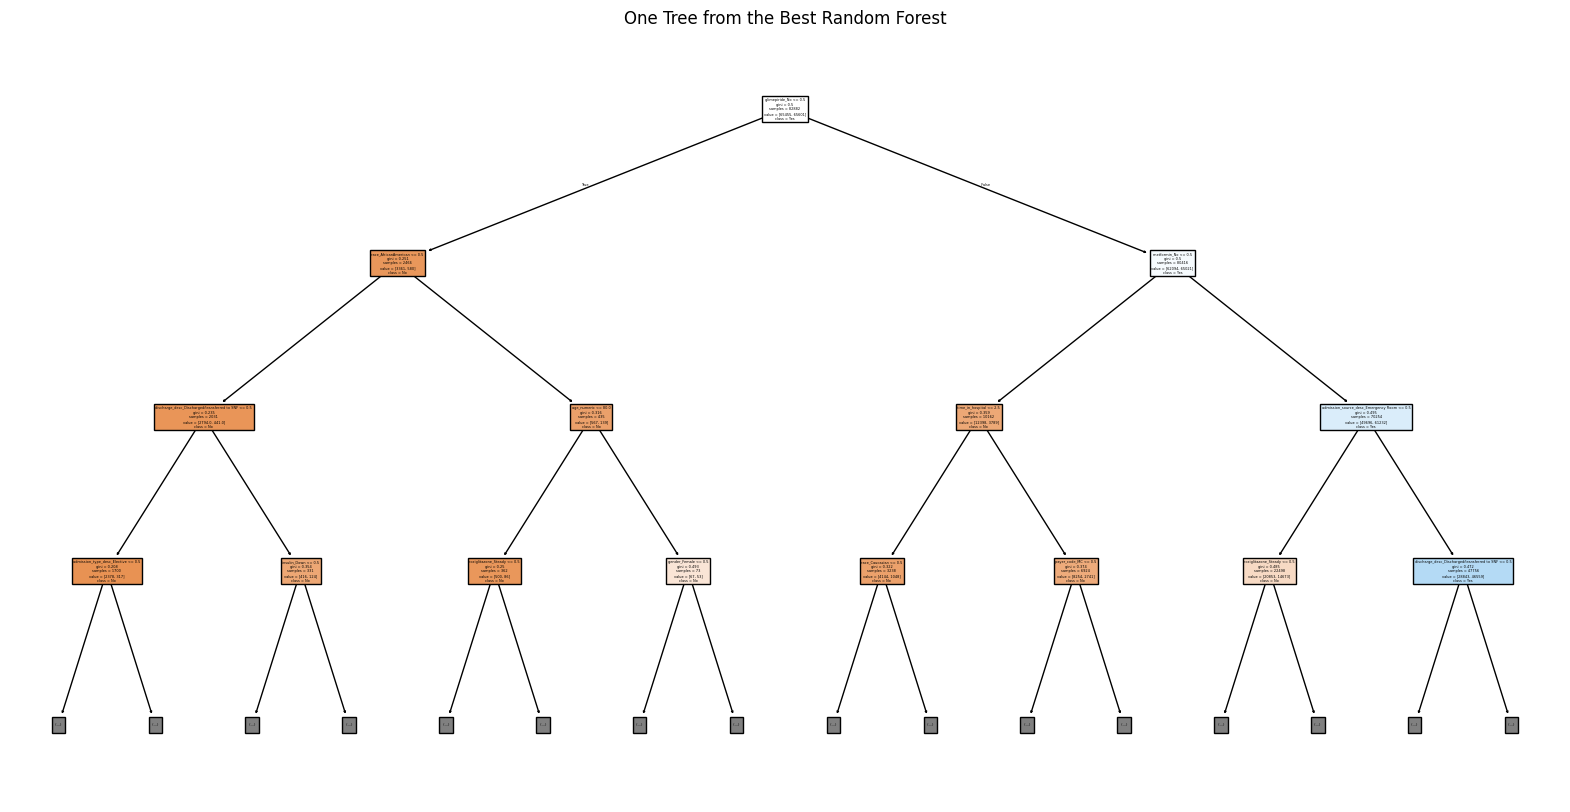

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare features and labels
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# Split the dataset (use stratify if highly imbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [i for i in range(9)],
    'class_weight': ['balanced']
}

# Initialize and search
rf = RandomForestClassifier(random_state=42)
#rf = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=4, class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=13, cv=3, scoring='recall', n_jobs=-1, random_state=42, verbose=1)

random_search.fit(x_train_res, y_train_res)

#print(f'Best parameters found: {random_search.best_params_}')

# Evaluate
#best_rf = random_search.best_estimator_
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("One Tree from the Best Random Forest")
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


scale = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13, 15],
    'weights': ['distance'],
    'metric': ['euclidean']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

best_knn = grid_search.best_estimator_

y_predict = best_knn.predict(x_test_scaled)

print("Best params: ", grid_search.best_params_)
print("Best cv score: ", grid_search.best_score_)
print("Accuracy: ", best_knn.score(x_test_scaled, y_test))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))

Best params:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best cv score:  0.9688888425997101
Accuracy:  0.9754591256297741

Confusion matrix :
 [[8145  427]
 [  26 9861]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.95      0.97      8572
        True       0.96      1.00      0.98      9887

    accuracy                           0.98     18459
   macro avg       0.98      0.97      0.98     18459
weighted avg       0.98      0.98      0.98     18459



In [ ]:
#Random Forest Model (Still needs further development)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    class_weight='balanced',  # Handles imbalance
    max_depth=6,            # Prevents overfitting
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")

              precision    recall  f1-score   support

       False       0.91      0.57      0.70     16383
        True       0.14      0.57      0.23      2076

    accuracy                           0.57     18459
   macro avg       0.53      0.57      0.47     18459
weighted avg       0.83      0.57      0.65     18459

AUC-ROC: 0.59


In [28]:
# from sklearn.metrics import accuracy_score

# X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
# y = data['readmitted_<30', 'readmitted_>30', 'readmitted_NO']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
# lgr = LogisticRegression()
# lgr.fit(X_train, y_train)
# y_pred = lgr.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=9, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report, recall_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
# y = data['readmitted_<30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# param_grid = {
#     'max_depth': list(range(3, 20))
#     #'max_depth': list(range(41, 61))
# }

# clf = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')

# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='recall',
#     cv=4,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# best_clf = grid_search.best_estimator_
# print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
# print(f"Best recall (CV average): {grid_search.best_score_:.4f}")

# y_pred = best_clf.predict(X_test)
# print("\nTest Set Evaluation:")
# print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.91      0.49      0.64     16374
        True       0.14      0.63      0.22      2085

    accuracy                           0.51     18459
   macro avg       0.52      0.56      0.43     18459
weighted avg       0.82      0.51      0.59     18459

